In [1]:
from datascience import *
import pandas as pd
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

# Russell Ranch - Plant Growth Metrics

In [2]:
RR_plant_growth_df = Table().read_table('RR_Plant_Growth_Metrics.csv')

Man_plant_growth_df = Table().read_table('Man_Plant_Growth_Metrics.csv')

# Remove all N/A values from shoot length
RR_normalized_plant_growth_df = RR_plant_growth_df.where('shoot_length_cm', are.above(0)).to_df()

Man_normalized_plant_growth_df = Man_plant_growth_df.where('shoot_length_cm', are.above(0)).to_df()

# Survived data
survived_plant_growth_df = pd.concat([RR_normalized_plant_growth_df, Man_normalized_plant_growth_df])

survived_plant_growth_df['seed_survival_rate'] = survived_plant_growth_df['seed_survival_rate'] * 100

# All data concatenated
all_plant_growth_df = pd.concat([RR_plant_growth_df.to_df(), Man_plant_growth_df.to_df()])
all_plant_growth_df['seed_survival_rate'] = all_plant_growth_df['seed_survival_rate'] * 100
all_plant_growth_df['shoot_length_cm'] = all_plant_growth_df['shoot_length_cm'].fillna(0)
all_plant_growth_df['num_spikelets'] = all_plant_growth_df['num_spikelets'].fillna(0)

In [3]:
def plot_plant_growth(dataframe, data_label, title, x_label, y_label):
    sns.boxplot(x='treatment', y=data_label, data=dataframe, hue='soil')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

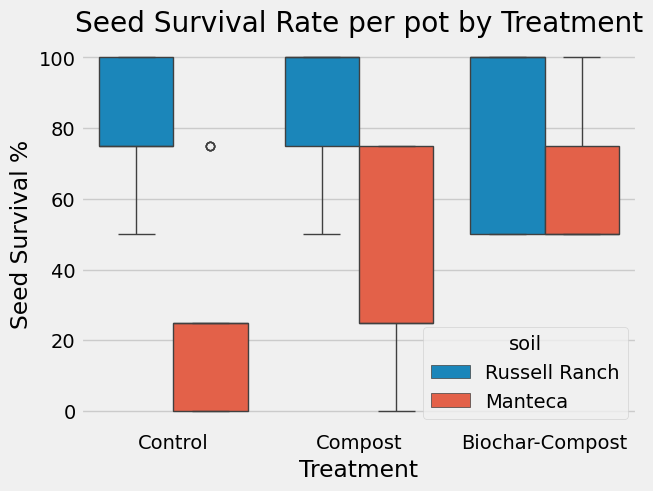

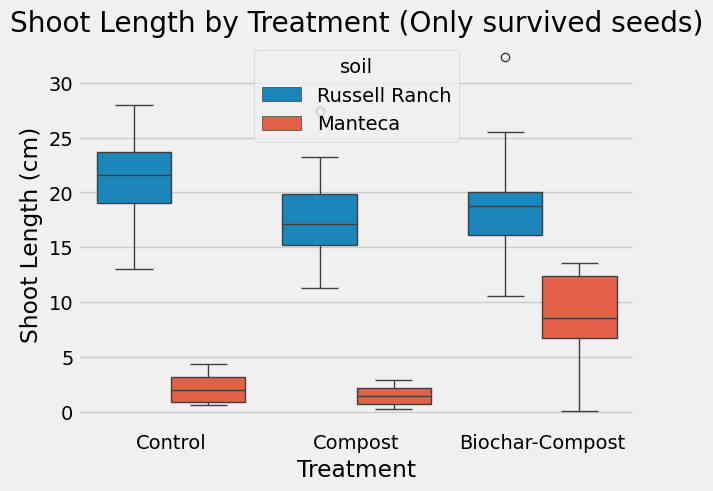

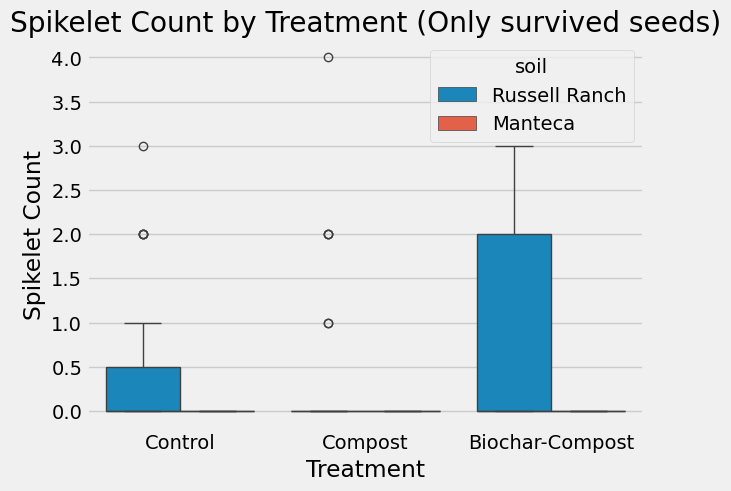

In [4]:
# Seed survival could only be 0, 0.25, 0.5, 0.75, or 1, so graph doesn't seem very useful.
# plt.ylim(-10, 110)
# plt.yticks(range(0, 110, 25))
plot_plant_growth(all_plant_growth_df, 'seed_survival_rate', 'Seed Survival Rate per pot by Treatment', 'Treatment', 'Seed Survival %')

# Shoot length by treatment plot
plot_plant_growth(survived_plant_growth_df, 'shoot_length_cm', 'Shoot Length by Treatment (Only survived seeds)', 'Treatment', 'Shoot Length (cm)')


# Not very significant data
plot_plant_growth(survived_plant_growth_df, 'num_spikelets', 'Spikelet Count by Treatment (Only survived seeds)', 'Treatment', 'Spikelet Count')


# Root length + biomass in manteca has null values. think of how to address
# plot_plant_growth('root_length_cm', 'Root Length by Treatment', 'Treatment', 'Root Length (cm)')
# plot_plant_growth('shoot_root_biomass_g', 'Root + Shoot Biomass by Treatment', 'Treatment', 'Root + Shoot Biomass')

In [5]:
RR_chem_properties_df = Table().read_table('RR_Chemical_Properties.csv').to_df()

Man_chem_properties_df = Table().read_table('Man_Chemical_Properties.csv').to_df()

RR_chem_properties_df['category'] = RR_chem_properties_df['Soil'] + '_' + RR_chem_properties_df['Treatment']
Man_chem_properties_df['category'] = Man_chem_properties_df['Soil'] + '_' + Man_chem_properties_df['Treatment']

chem_properties_df = pd.concat([RR_chem_properties_df, Man_chem_properties_df])

t0_chem_properties_df = chem_properties_df.where(chem_properties_df['Time'] == "T0").dropna()
end_chem_properties_df = chem_properties_df.where(chem_properties_df['Time'] == "end").dropna()
# RR_ph_averages_df = RR_chem_properties_df[['Treatment', 'pH', 'Time']]
# RR_ph_averages_df.groupby(['Treatment', 'Time']).mean()
# RR_ph_diffs_df = RR_ph_averages_df['Treatment']

In [6]:
def plot_chem_properties(data_label, title, x_label, y_label):
    fig, axes = plt.subplots(1, 2, figsize=(12,8))
    
    sns.boxplot(x='Treatment', y=data_label, data=RR_chem_properties_df, hue='Time', ax=axes[0])
    sns.boxplot(x='Treatment', y=data_label, data=Man_chem_properties_df, hue='Time', ax=axes[1])
    axes[0].set_title('Russell Ranch')
    axes[1].set_title('Manteca')
    fig.suptitle(title)
    
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    
    axes[0].set_ylim(6.5, 9)
    axes[1].set_ylim(6.5, 9)
    plt.show()

In [7]:
def plot_ph_properties(data_label, title, x_label, y_label):
    fig, axes = plt.subplots(1, 2, figsize=(12,8))
    sns.boxplot(x='Treatment', y=data_label, data=t0_chem_properties_df, hue='Soil', ax=axes[0])
    sns.boxplot(x='Treatment', y=data_label, data=end_chem_properties_df, hue='Soil', ax=axes[1])
    axes[0].set_title('T0')
    axes[1].set_title('9 Weeks')
    fig.suptitle(title)
    
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)

    axes[0].set_ylim(6.5, 9)
    axes[1].set_ylim(6.5, 9)
    plt.show()

def plot_ec_properties(data_label, title, x_label, y_label):
    fig, axes = plt.subplots(1, 2, figsize=(12,8))
    sns.boxplot(x='Treatment', y=data_label, data=t0_chem_properties_df, hue='Soil', ax=axes[0])
    sns.boxplot(x='Treatment', y=data_label, data=end_chem_properties_df, hue='Soil', ax=axes[1])
    axes[0].set_title('T0')
    axes[1].set_title('9 Weeks')
    fig.suptitle(title)
    
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)

    axes[0].set_ylim(-100, 1100)
    axes[1].set_ylim(-100, 1100)
    plt.show()

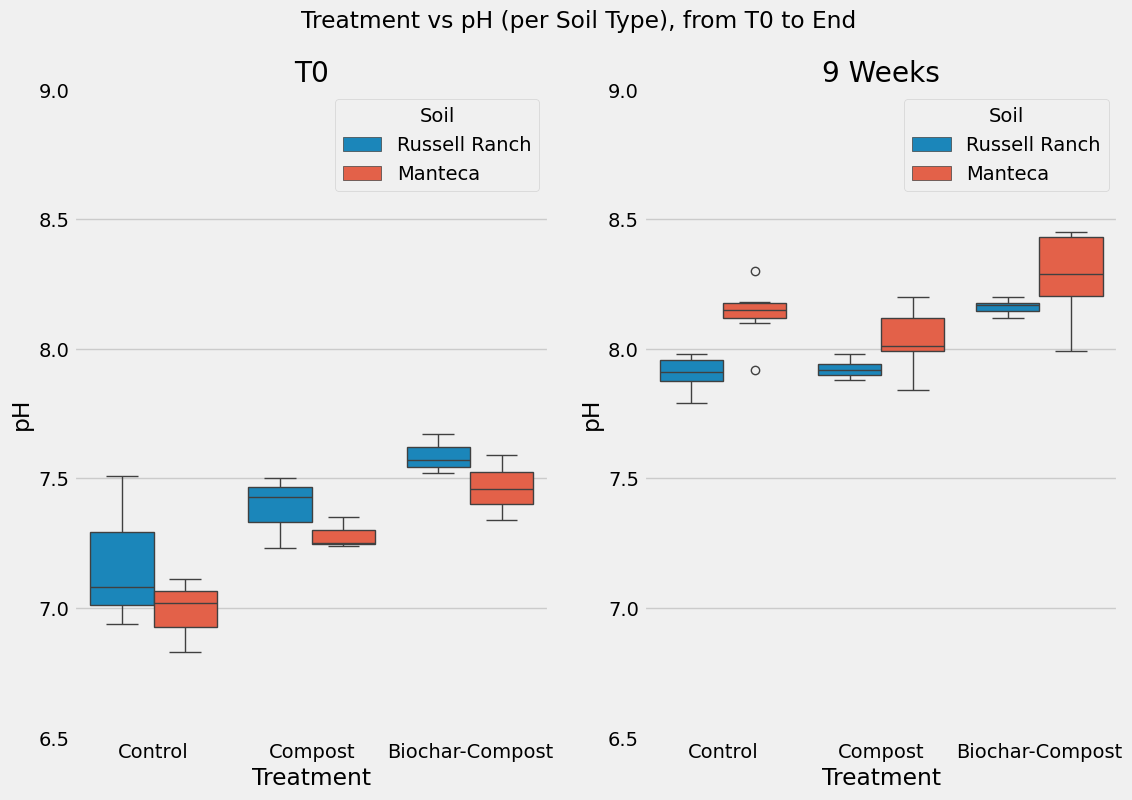

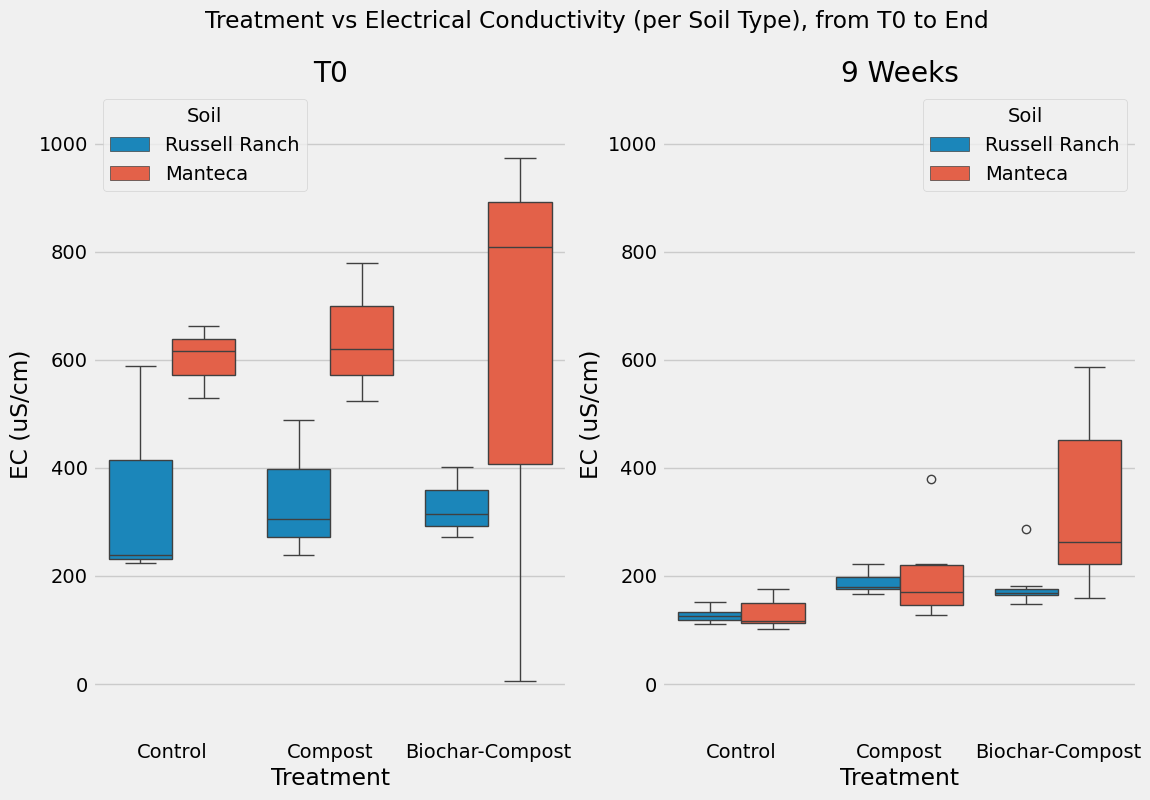

In [8]:
plot_ph_properties('pH', "Treatment vs pH (per Soil Type), from T0 to End", "Treatment", "pH")
plot_ec_properties('EC (uS/cm)', "Treatment vs Electrical Conductivity (per Soil Type), from T0 to End", "Treatment", "EC (uS/cm)")

# Statistical Analysis

In [9]:
# Logistic Regression for soil type and treatment for seed survival (since binary)
# Count regression for soil type and treatment for spikelet count
# Regression for soil type and treatment for shoot length

## Seed Survival Statistics

In [10]:
# Ensure categorical columns are strings (sometimes they might have mixed types)
plant_growth_variables = all_plant_growth_df[['soil', 'treatment', 'seed_survival']]

# Convert categorical variables to dummy variables (one-hot encoding)
plant_growth_variables = pd.get_dummies(plant_growth_variables, columns=['soil', 'treatment'])

print(plant_growth_variables)

plant_growth_variables = plant_growth_variables.drop(['soil_Russell Ranch', 'treatment_Control'], axis=1)

plant_growth_variables = plant_growth_variables.astype('int32')

# Define independent variables (predictors)
independent_variables = plant_growth_variables.drop(columns=['seed_survival'])  # Drop the dependent variable
independent_variables = sm.add_constant(independent_variables)  # Add an intercept term


# Define dependent variable (response)
dependent_variable = plant_growth_variables['seed_survival']

# Fit logistic regression model
logistic_regression = sm.Logit(dependent_variable, independent_variables).fit()

# Print summary
print(logistic_regression.summary())

    seed_survival  soil_Manteca  soil_Russell Ranch  \
0               1         False                True   
1               1         False                True   
2               1         False                True   
3               0         False                True   
4               1         False                True   
..            ...           ...                 ...   
79              0          True               False   
80              1          True               False   
81              1          True               False   
82              0          True               False   
83              1          True               False   

    treatment_Biochar-Compost  treatment_Compost  treatment_Control  
0                       False              False               True  
1                       False              False               True  
2                       False              False               True  
3                       False              False           

## Shoot length statistics

In [11]:
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plant_growth_variables = all_plant_growth_df[['soil', 'treatment', 'shoot_length_cm']]

# FIRST ATTEMPT: CONDUCTING SHOOT LENGTH TEST AS LINEAR REGRESSION WITH 1-HOT ENCODINGS

# # Convert categorical variables to dummy variables (one-hot encoding)
# plant_growth_variables = pd.get_dummies(plant_growth_variables, columns=['soil', 'treatment'])

# plant_growth_variables = plant_growth_variables.drop(['soil_Russell Ranch', 'treatment_Control'], axis=1)

# plant_growth_variables = plant_growth_variables.astype('int32')

# # Define independent variables (predictors)
# independent_variables = plant_growth_variables.drop(columns=['shoot_length_cm'])  # Drop the dependent variable
# independent_variables = sm.add_constant(independent_variables)  # Add an intercept term

# # Define dependent variable (response)
# dependent_variable = plant_growth_variables['shoot_length_cm']

# result = sm.OLS(dependent_variable, independent_variables).fit()
# print(result.summary())


# SECOND ATTEMPT: CONDUCTING SHOOT LENGTH TEST USING 2 WAY ANOVA

# Fit two-way ANOVA model
model = smf.ols('shoot_length_cm ~ C(soil) + C(treatment) + C(soil):C(treatment)', data=plant_growth_variables).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


# Combine soil and treatment into a single factor for comparison
plant_growth_variables.loc[:, 'soil_treatment'] = plant_growth_variables['soil'].astype(str) + " - " + plant_growth_variables['treatment'].astype(str)

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(plant_growth_variables['shoot_length_cm'], plant_growth_variables['soil_treatment'])
print(tukey)


                           sum_sq     df           F        PR(>F)
C(soil)               8385.307202    1.0  224.731227  2.009390e-32
C(treatment)           108.315833    2.0    1.451464  2.372566e-01
C(soil):C(treatment)   334.055119    2.0    4.476438  1.281524e-02
Residual              6044.641786  162.0         NaN           NaN


/tmp/ipykernel_1890/1644668585.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_growth_variables.loc[:, 'soil_treatment'] = plant_growth_variables['soil'].astype(str) + " - " + plant_growth_variables['treatment'].astype(str)


                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
      Manteca - Biochar-Compost               Manteca - Compost  -4.4643  0.074 -9.1727  0.2442  False
      Manteca - Biochar-Compost               Manteca - Control  -4.6036 0.0594  -9.312  0.1049  False
      Manteca - Biochar-Compost Russell Ranch - Biochar-Compost  10.2393    0.0  5.5308 14.9477   True
      Manteca - Biochar-Compost         Russell Ranch - Compost    10.85    0.0  6.1415 15.5585   True
      Manteca - Biochar-Compost         Russell Ranch - Control  12.2321    0.0  7.5237 16.9406   True
              Manteca - Compost               Manteca - Control  -0.1393    1.0 -4.8477  4.5692  False
              Manteca - Compost Russell Ranch - Biochar-Compost  14.7036 

## Spikelet Count Statistics

In [12]:
import statsmodels.formula.api as smf

plant_growth_variables = all_plant_growth_df[['soil', 'treatment', 'num_spikelets']]
print(plant_growth_variables)

plant_growth_variables['soil'] = pd.Categorical(plant_growth_variables['soil'], categories=['Russell Ranch', 'Manteca'], ordered=False)
plant_growth_variables['treatment'] = pd.Categorical(plant_growth_variables['treatment'], categories=['Control', 'Compost', 'Biochar-Compost'], ordered=False)


model = smf.glm(formula="num_spikelets ~ soil + treatment", 
                data=plant_growth_variables, 
                family=sm.families.Poisson()).fit()
print(model.summary())

pearson_chi2 = model.pearson_chi2
df_residual = model.df_resid
dispersion = pearson_chi2 / df_residual
print(f"Dispersion: {dispersion:.2f}")  # If >1, consider Negative Binomial

plant_growth_variables.loc[:, 'soil_treatment'] = plant_growth_variables['soil'].astype(str) + " - " + plant_growth_variables['treatment'].astype(str)

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(plant_growth_variables['num_spikelets'], plant_growth_variables['soil_treatment'])
print(tukey)

             soil        treatment  num_spikelets
0   Russell Ranch          Control            0.0
1   Russell Ranch          Control            2.0
2   Russell Ranch          Control            3.0
3   Russell Ranch          Control            0.0
4   Russell Ranch          Control            0.0
..            ...              ...            ...
79        Manteca  Biochar-Compost            0.0
80        Manteca  Biochar-Compost            0.0
81        Manteca  Biochar-Compost            0.0
82        Manteca  Biochar-Compost            0.0
83        Manteca  Biochar-Compost            0.0

[168 rows x 3 columns]
                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_spikelets   No. Observations:                  168
Model:                            GLM   Df Residuals:                      164
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:              

/tmp/ipykernel_1890/1789080788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_growth_variables['soil'] = pd.Categorical(plant_growth_variables['soil'], categories=['Russell Ranch', 'Manteca'], ordered=False)
/tmp/ipykernel_1890/1789080788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_growth_variables['treatment'] = pd.Categorical(plant_growth_variables['treatment'], categories=['Control', 'Compost', 'Biochar-Compost'], ordered=False)
/tmp/ipykernel_1890/1789080788.py:20: SettingWithCo

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
             group1                          group2             meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------------
      Manteca - Biochar-Compost               Manteca - Compost      0.0    1.0 -0.5203 0.5203  False
      Manteca - Biochar-Compost               Manteca - Control      0.0    1.0 -0.5203 0.5203  False
      Manteca - Biochar-Compost Russell Ranch - Biochar-Compost   0.6786 0.0032  0.1582 1.1989   True
      Manteca - Biochar-Compost         Russell Ranch - Compost   0.4286 0.1711 -0.0918 0.9489  False
      Manteca - Biochar-Compost         Russell Ranch - Control   0.4286 0.1711 -0.0918 0.9489  False
              Manteca - Compost               Manteca - Control      0.0    1.0 -0.5203 0.5203  False
              Manteca - Compost Russell Ranch - Biochar-Compost   0.6786 0.0032  0

In [13]:
import statsmodels.formula.api as smf
from statsmodels.discrete.count_model import ZeroInflatedPoisson

plant_growth_variables = all_plant_growth_df[['soil', 'treatment', 'num_spikelets']]
print(plant_growth_variables)

plant_growth_variables['soil'] = pd.Categorical(plant_growth_variables['soil'], categories=['Russell Ranch', 'Manteca'], ordered=False)
plant_growth_variables['treatment'] = pd.Categorical(plant_growth_variables['treatment'], categories=['Control', 'Compost', 'Biochar-Compost'], ordered=False)


zip_model = ZeroInflatedPoisson.from_formula(
    "num_spikelets ~ soil + treatment",  # Main Poisson regression
    data=plant_growth_variables
).fit()

print(zip_model.summary())

mu = zip_model.predict()
pearson_chi2 = ((plant_growth_variables["num_spikelets"] - mu) ** 2 / mu).sum()
dispersion_ratio = pearson_chi2 / (len(plant_growth_variables) - zip_model.df_model)
print("Dispersion Ratio:", dispersion_ratio)

             soil        treatment  num_spikelets
0   Russell Ranch          Control            0.0
1   Russell Ranch          Control            2.0
2   Russell Ranch          Control            3.0
3   Russell Ranch          Control            0.0
4   Russell Ranch          Control            0.0
..            ...              ...            ...
79        Manteca  Biochar-Compost            0.0
80        Manteca  Biochar-Compost            0.0
81        Manteca  Biochar-Compost            0.0
82        Manteca  Biochar-Compost            0.0
83        Manteca  Biochar-Compost            0.0

[168 rows x 3 columns]
         Current function value: 0.447112
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:           num_spikelets   No. Observations:                  168
Model:             ZeroInflatedPoisson   Df Residuals:                      164
Me

/tmp/ipykernel_1890/1548502863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_growth_variables['soil'] = pd.Categorical(plant_growth_variables['soil'], categories=['Russell Ranch', 'Manteca'], ordered=False)
/tmp/ipykernel_1890/1548502863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_growth_variables['treatment'] = pd.Categorical(plant_growth_variables['treatment'], categories=['Control', 'Compost', 'Biochar-Compost'], ordered=False)
/srv/conda/lib/python3.11/site-packages/scipy/optim

<Axes: xlabel='pH', ylabel='Count'>

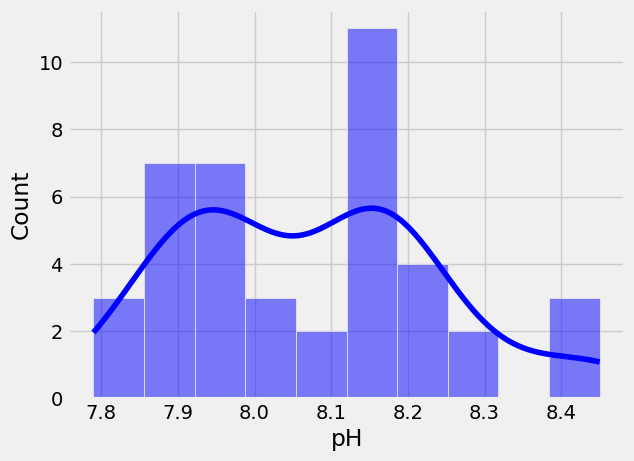

In [14]:
sns.histplot(end_chem_properties_df['pH'], kde=True, bins=10, color='blue')

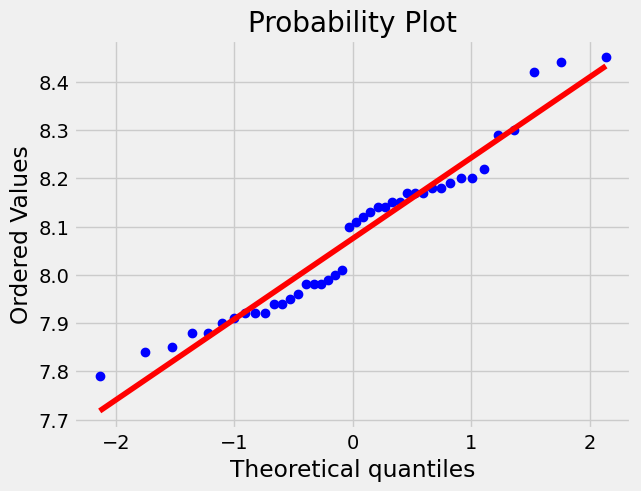

In [15]:
import scipy.stats as stats

stats.probplot(end_chem_properties_df['pH'], dist="norm", plot=plt)
plt.show()

In [16]:
import pandas as pd
import scipy.stats as stats

# Function to run Shapiro-Wilk test for each group
def check_normality(data):
    groups = data.groupby(['Soil', 'Treatment', 'Time'])
    results = {}
    for name, group in groups:
        stat, p = stats.shapiro(group['pH'])  # Run Shapiro-Wilk test
        results[name] = p
    return pd.DataFrame.from_dict(results, orient='index', columns=['p-value'])

# Apply function
normality_results = check_normality(chem_properties_df)
print(normality_results)

                                        p-value
(Manteca, Biochar-Compost, T0)         0.955902
(Manteca, Biochar-Compost, end)        0.323260
(Manteca, Compost, T0)                 0.157167
(Manteca, Compost, end)                0.828315
(Manteca, Control, T0)                 0.611637
(Manteca, Control, end)                0.333473
(Russell Ranch, Biochar-Compost, T0)   0.636887
(Russell Ranch, Biochar-Compost, end)  0.957228
(Russell Ranch, Compost, T0)           0.482165
(Russell Ranch, Compost, end)          0.471318
(Russell Ranch, Control, T0)           0.454347
(Russell Ranch, Control, end)          0.591716


## This means that **normality is not violated**!!! (since p > 0.05)

In [17]:
import pingouin as pg

sphericity = pg.sphericity(chem_properties_df, dv='pH', within='Time', subject='Sample')
print(sphericity)

(True, nan, nan, 1, 1.0)


# pH and EC measurements

In [23]:
RR_chem_properties_df = Table().read_table('RR_Chemical_Properties.csv').to_df()

Man_chem_properties_df = Table().read_table('Man_Chemical_Properties.csv').to_df()

RR_chem_properties_df['category'] = RR_chem_properties_df['Soil'] + '_' + RR_chem_properties_df['Treatment']
Man_chem_properties_df['category'] = Man_chem_properties_df['Soil'] + '_' + Man_chem_properties_df['Treatment']

chem_properties_df = pd.concat([RR_chem_properties_df, Man_chem_properties_df])

t0_chem_properties_df = chem_properties_df.where(chem_properties_df['Time'] == "T0").dropna()
end_chem_properties_df = chem_properties_df.where(chem_properties_df['Time'] == "end").dropna()
# RR_ph_averages_df = RR_chem_properties_df[['Treatment', 'pH', 'Time']]
# RR_ph_averages_df.groupby(['Treatment', 'Time']).mean()
# RR_ph_diffs_df = RR_ph_averages_df['Treatment']

In [24]:
t0_avg = t0_chem_properties_df.groupby('category')[['pH', 'EC (uS/cm)']].mean()
t0_avg = t0_avg.rename(columns={'pH': 'Avg_T0_pH', 'EC (uS/cm)': 'Avg_T0_EC'})

end_chem_properties_df = end_chem_properties_df.merge(t0_avg, on='category')
end_chem_properties_df["delta_pH"] = end_chem_properties_df["pH"] - end_chem_properties_df["Avg_T0_pH"]
end_chem_properties_df["delta_EC"] = end_chem_properties_df["EC (uS/cm)"] - end_chem_properties_df["Avg_T0_EC"]

## Check for normality

In [44]:
# Check normality assumption with Shapiro-Wilk test for each Soil-Treatment combination
print("Normality Test (Shapiro-Wilk p-values)")
normality_data = {"Soil": [], "Treatment": [], "p-value": []}
for (soil, treatment), group in end_chem_properties_df.groupby(["Soil", "Treatment"]):
    stat, p_value = stats.shapiro(group["delta_pH"])
    normality_data['Soil'].append(soil)
    normality_data['Treatment'].append(treatment)
    normality_data['p-value'].append(p_value)

print(pd.DataFrame(normality_data))

Normality Test (Shapiro-Wilk p-values)
            Soil        Treatment   p-value
0        Manteca  Biochar-Compost  0.323260
1        Manteca          Compost  0.828315
2        Manteca          Control  0.333473
3  Russell Ranch  Biochar-Compost  0.957228
4  Russell Ranch          Compost  0.471318
5  Russell Ranch          Control  0.591716


The result above shows us that our data is normal. Across all of the p-values, we see that the data cannot reject the null hypothesis, and therefore shows normality.

## Check for Homogeneity of Variance using Bartlett's Test

In [53]:
# Check homogeneity of variance (Bartlett's test)
bartlett_stat, bartlett_p = stats.bartlett(
    *[group["delta_pH"].values for _, group in end_chem_properties_df.groupby(["Soil", "Treatment"])]
)
print(f"Bartlett's Test results in a p-value of {levene_p}")

Bartlett's Test results in a p-value of 0.0003647800175926338


Since this value is less than 0.05, we reject the null hypothesis, that the variances are similar. This means that we cannot follow a simple ANOVA procedure to calculate significance of our data. Instead, we will have to use an alternative strategy, like Welch's ANOVA. 

## Conduct Welch's ANOVA

# *

In [56]:
import pingouin as pg
welch_anova_results = pg.welch_anova(dv="delta_pH", between=["Soil", "Treatment"], data=end_chem_properties_df)

ValueError: Length of values (2) does not match length of index (1)

# PREVIOUS WORK

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert Table to pandas DataFrame
RR_normalized_df = RR_normalized_plant_growth_df

# Define your ANOVA model
# Assuming 'shoot_length_cm' is the dependent variable and 'treatment' is the factor
model_shoot_length = ols('shoot_length_cm ~ C(treatment) + C(soil) + C(treatment):C(soil)', data=plant_growth_df).fit()

# Perform ANOVA
anova_table_shoot_length = sm.stats.anova_lm(model_shoot_length, typ=2)

# Display results
print("ANOVA Table:")
print(anova_table_shoot_length)

The ANOVA table indicates the following:

Sum of Squares (sum_sq):

C(treatment): The variation in shoot_length_cm explained by differences in the treatment groups (133.81).
Residual: The unexplained variation or error (1103.76).
Degrees of Freedom (df):

C(treatment): 2 degrees of freedom (3 treatment groups - 1).
Residual: 68 degrees of freedom (total observations - number of groups).
F-statistic (F):

The F-value (4.12) tests whether the variation among treatment group means is significantly greater than what would be expected by chance.
p-value (PR(>F)):

The p-value (0.020433) indicates the probability of observing this result, assuming the null hypothesis (no difference among treatment means) is true.
Interpretation:
Significance: The p-value is 0.020433, which is below the common threshold of 0.05. Therefore, you can reject the null hypothesis and conclude that there are statistically significant differences in shoot length among the treatment groups.
Next Steps:
Post-hoc Tests:

Perform pairwise comparisons (e.g., Tukey's HSD) to identify which treatments differ significantly.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_shoot_length = pairwise_tukeyhsd(endog=RR_normalized_df['shoot_length_cm'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_shoot_length)

Interpretation of Tukey's HSD Results
Compost vs. Compost-Biochar:

Mean Difference: 0.8075
p-value (p-adj): 0.768
Conclusion: There is no statistically significant difference between the Compost and Compost-Biochar treatments, as the p-value is greater than 0.05.
Compost vs. Control:

Mean Difference: 3.2336
p-value (p-adj): 0.0191
Conclusion: There is a statistically significant difference between the Compost and Control treatments, as the p-value is less than 0.05. The Compost treatment resulted in higher shoot length compared to the Control.
Compost-Biochar vs. Control:

Mean Difference: 2.4261
p-value (p-adj): 0.11
Conclusion: There is no statistically significant difference between the Compost-Biochar and Control treatments, as the p-value is greater than 0.05.
Summary:
The Compost treatment significantly increases shoot length compared to the Control.
No significant differences were observed between Compost and Compost-Biochar or between Compost-Biochar and Control.


In [ ]:
#For seed survival
model_seed_survival = ols('seed_survival_rate ~ C(treatment)', data=RR_normalized_df).fit()

# Perform ANOVA
anova_seed_survival = sm.stats.anova_lm(model_seed_survival, typ=2)

# Display results
print("ANOVA Table:")
print(anova_seed_survival)

In [ ]:
tukey_seed_survival = pairwise_tukeyhsd(endog=RR_normalized_df['seed_survival_rate'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_seed_survival)

In [ ]:
#Now for num_spikelets
#For seed survival
model_spikelets = ols('num_spikelets ~ C(treatment)', data=RR_normalized_df).fit()

# Perform ANOVA
anova_spikelets = sm.stats.anova_lm(model_spikelets, typ=2)

# Display results
print("ANOVA Table:")
print(anova_spikelets)

In [ ]:
tukey_spikelets = pairwise_tukeyhsd(endog=RR_normalized_df['num_spikelets'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_spikelets)

In [ ]:
#Now for root length
model_root_length = ols('root_length_cm ~ C(treatment)', data=RR_normalized_df).fit()
anova_root_length = sm.stats.anova_lm(model_root_length, typ=2)
print("ANOVA Table:")
print(anova_root_length)

In [ ]:
tukey_root_length = pairwise_tukeyhsd(endog=RR_normalized_df['root_length_cm'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_root_length)

In [ ]:
#Now for shoot_root_biomass_g
model_shoot_root_biomass = ols('shoot_root_biomass_g ~ C(treatment)', data=RR_normalized_df).fit()
anova_shoot_root_biomass = sm.stats.anova_lm(model_shoot_root_biomass, typ=2)
print("ANOVA Table:")
print(anova_shoot_root_biomass)

In [ ]:
tukey_shoot_root_biomass = pairwise_tukeyhsd(endog=RR_normalized_df['shoot_root_biomass_g'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_shoot_root_biomass)

---------------------

# Manteca - Plant Growth Metrics

In [ ]:
Man_plant_growth_df = Table().read_table('Man_Plant_Growth_Metrics.csv')

Man_normalized_plant_growth_df = Man_plant_growth_df.where('shoot_length_cm', are.above(0))

In [ ]:
# Convert Table to pandas DataFrame
Man_normalized_df = Man_normalized_plant_growth_df.to_df()

# Define your ANOVA model
# Assuming 'shoot_length_cm' is the dependent variable and 'treatment' is the factor
model_shoot_length = ols('shoot_length_cm ~ C(treatment)', data=Man_normalized_df).fit()

# Perform ANOVA
anova_table_shoot_length = sm.stats.anova_lm(model_shoot_length, typ=2)

# Display results
print("ANOVA Table:")
print(anova_table_shoot_length)

In [ ]:
tukey_shoot_length = pairwise_tukeyhsd(endog=Man_normalized_df['shoot_length_cm'],
                          groups=Man_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_shoot_length)

In [ ]:
#For seed survival
model_seed_survival = ols('seed_survival_rate ~ C(treatment)', data=Man_normalized_df).fit()

# Perform ANOVA
anova_seed_survival = sm.stats.anova_lm(model_seed_survival, typ=2)

# Display results
print("ANOVA Table:")
print(anova_seed_survival)

In [ ]:
tukey_seed_survival = pairwise_tukeyhsd(endog=Man_normalized_df['seed_survival_rate'],
                          groups=Man_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_seed_survival)

In [ ]:
#Now for num_spikelets
#For seed survival
model_spikelets = ols('num_spikelets ~ C(treatment)', data=Man_normalized_df).fit()

# Perform ANOVA
anova_spikelets = sm.stats.anova_lm(model_spikelets, typ=2)

# Display results
print("ANOVA Table:")
print(anova_spikelets)

In [ ]:
## NO SPIKELETS!!!

In [ ]:
#Now for root length
model_root_length = ols('root_length_cm ~ C(treatment)', data=Man_normalized_df).fit()
anova_root_length = sm.stats.anova_lm(model_root_length, typ=2)
print("ANOVA Table:")
print(anova_root_length)

In [ ]:
tukey_root_length = pairwise_tukeyhsd(endog=Man_normalized_df['root_length_cm'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_root_length)

In [ ]:
#Now for shoot_root_biomass_g
model_shoot_root_biomass = ols('shoot_root_biomass_g ~ C(treatment)', data=Man_normalized_df).fit()
anova_shoot_root_biomass = sm.stats.anova_lm(model_shoot_root_biomass, typ=2)
print("ANOVA Table:")
print(anova_shoot_root_biomass)

In [ ]:
tukey_shoot_root_biomass = pairwise_tukeyhsd(endog=RR_normalized_df['shoot_root_biomass_g'],
                          groups=RR_normalized_df['treatment'],
                          alpha=0.05)
print(tukey_shoot_root_biomass)

--------

# Russell Ranch - pH & EC

In [ ]:
RR_chem = Table().read_table('RR_Chemical_Properties.csv')

RR_chem_df = RR_chem.to_df()

# Separate T0 and End data
RR_T0 = RR_chem_df[RR_chem_df["Sample"].str.contains("T0")]
RR_end = RR_chem_df[RR_chem_df["Sample"].str.contains("end")]

In [ ]:
from scipy.stats import shapiro, levene

# Normality test (Shapiro-Wilk)
shapiro_T0_pH = shapiro(RR_T0["pH"])[1]
shapiro_end_pH = shapiro(RR_end["pH"])[1]
shapiro_T0_EC = shapiro(RR_T0["EC (uS/cm)"])[1]
shapiro_end_EC = shapiro(RR_end["EC (uS/cm)"])[1]

print(f"Shapiro-Wilk p-values: T0 pH={shapiro_T0_pH}, End pH={shapiro_end_pH}")
print(f"Shapiro-Wilk p-values: T0 EC={shapiro_T0_EC}, End EC={shapiro_end_EC}")

# Homogeneity of variance (Levene’s test)
levene_pH = levene(RR_T0["pH"], RR_end["pH"])[1]
levene_EC = levene(RR_T0["EC (uS/cm)"], RR_end["EC (uS/cm)"])[1]

print(f"Levene's test p-values: pH={levene_pH}, EC={levene_EC}")

### non-normal because p>0.05 -> use non-parametric test

In [ ]:
from scipy.stats import mannwhitneyu

u_pH, p_mwu_pH = mannwhitneyu(RR_T0["pH"], RR_end["pH"])
u_EC, p_mwu_EC = mannwhitneyu(RR_T0["EC (uS/cm)"], RR_end["EC (uS/cm)"])

print(f"Mann-Whitney U test for pH: U={u_pH}, p={p_mwu_pH}")
print(f"Mann-Whitney U test for EC: U={u_EC}, p={p_mwu_EC}")

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=["T0"]*len(RR_T0) + ["End"]*len(RR_end), y=RR_T0["pH"].tolist() + RR_end["pH"].tolist())
plt.title("pH Distribution at T0 and End")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=["T0"]*len(RR_T0) + ["End"]*len(RR_end), y=RR_T0["EC (uS/cm)"].tolist() + RR_end["EC (uS/cm)"].tolist())
plt.title("EC Distribution at T0 and End")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(RR_T0["pH"], kde=True, color="blue", label="T0", bins=10)
sns.histplot(RR_end["pH"], kde=True, color="red", label="End", bins=10)
plt.legend()
plt.title("pH Distribution: T0 vs End")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(RR_T0["EC (uS/cm)"], kde=True, color="blue", label="T0", bins=10)
sns.histplot(RR_end["EC (uS/cm)"], kde=True, color="red", label="End", bins=10)
plt.legend()
plt.title("EC Distribution: T0 vs End")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=RR_T0["pH"], y=RR_T0["EC (uS/cm)"], color="blue", label="T0")
sns.scatterplot(x=RR_end["pH"], y=RR_end["EC (uS/cm)"], color="red", label="End")
plt.title("pH vs. EC Scatter Plot: T0 vs End")
plt.xlabel("pH")
plt.ylabel("EC (uS/cm)")
plt.legend()
plt.show()


consider running tests separately for ec and ph!!!!!

--------

In [ ]:
# Manteca - pH & EC